In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
database = 'database.sqlite'
conn = sqlite3.connect('../database/database.sqlite')

In [2]:
sql = """select league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A from Match where league_id=21518 or league_id= 1729 or league_id=4769 or league_id=10257"""                  

data = pd.read_sql(sql,conn)
data

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A
0,1729,2008/2009,1,10260,10261,1,1,1.29,5.50,11.00
1,1729,2008/2009,1,9825,8659,1,0,1.20,6.50,15.00
2,1729,2008/2009,1,8472,8650,0,1,5.50,3.60,1.67
3,1729,2008/2009,1,8654,8528,2,1,1.91,3.40,4.20
4,1729,2008/2009,1,10252,8456,4,2,1.91,3.40,4.33
5,1729,2008/2009,1,8668,8655,2,3,2.00,3.30,4.00
6,1729,2008/2009,1,8549,8586,2,1,3.20,3.40,2.25
7,1729,2008/2009,1,8559,10194,3,1,1.83,3.50,4.50
8,1729,2008/2009,1,8667,9879,2,1,2.60,3.20,2.80
9,1729,2008/2009,1,8455,8462,4,0,1.33,5.00,10.00


In [3]:
#Converting season values

def change_season(match):
    if match['season'] =='2008/2009':
        return 0
    elif match['season'] =='2009/2010':
        return 1
    elif match['season'] =='2010/2011':
        return 2
    elif match['season'] =='2011/2012':
        return 3
    elif match['season'] =='2012/2013':
        return 4
    elif match['season'] =='2013/2014':
        return 5
    elif match['season'] =='2014/2015':
        return 6
    else:
        return 7
    
data['season']=data.apply(change_season, axis=1) 

#Classifing Match output
def determine_home_result(match):
    if match['home_team_goal'] > match['away_team_goal']:
        return 1
    elif match['home_team_goal'] < match['away_team_goal']:
        return 2
    else:
        return 0
    
    
data['Output']=data.apply(determine_home_result, axis=1)

data= data.dropna()



In [4]:
#função SVM

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import log_loss


train = data[data['season']<=5]
val = data[data['season']==6]
test = data[data['season']==7]

ft=['league_id','season','stage','home_team_api_id','away_team_api_id','B365H','B365D','B365A']
out=['Output']
def SVM_validation(kernel,C,train,val,ft,out):
    best=[]
    sc_max=-10000
    print kernel
    print C
    print ft
    print out
    for kernel_type in kernel:
        print kernel_type
        for cv in C:
            print cv
            clf = SVC(C=cv,kernel=kernel_type)
            clf.fit(train[ft],train[out])
            score = log_loss(val[out], clf.predict(val[ft]))
            if score>sc_max:
                best=clf
                sc_max=score
    return best

c = range(1,2)
kernel=['poly', 'rbf', 'sigmoid']
#svm = SVM_validation (kernel,c,train,val,ft,out)


In [9]:
#Função logreg
from sklearn import linear_model
from sklearn.metrics import f1_score

def logreg_validation(C,solver,train,val,ft,out):
    sc_max = -10000
    best=[]
    for s in solver:
        for cv in C:
            print s,cv
            lg = linear_model.LogisticRegression(C=cv,solver=s,n_jobs=-1,max_iter=100000)
            lg.fit(train[ft],train[out])
            score = f1_score(val[out], lg.predict(val[ft]),average='weighted')
            if score>sc_max:
                best=lg
                sc_max=score
    return best

C= [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag']
logreg=logreg_validation(C,solver,train,val,ft,out)
print logreg


 newton-cg 0.001


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anac

newton-cg 0.01


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/

newton-cg 0.1


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/

newton-cg 1


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/op

newton-cg 10


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/op

newton-cg 100


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/op

newton-cg 1000


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/op

lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=-1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [10]:
print f1_score(test[out],logreg.predict(test[ft]),average='weighted')
print f1_score(test[out],logreg.predict(test[ft]),average='macro')
print f1_score(test[out],logreg.predict(test[ft]),average='micro')


0.423700119474
0.372542829717
0.504279131007


In [12]:
#Função RandomForest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def rf_validation(n_estimators,train,val,ft,out):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n,n_jobs=-1)
        rf.fit(train[ft],train[out])
        score = f1_score(val[out], rf.predict(val[ft]),average='weighted')
        if score>sc_max:
            best=rf
            sc_max=score
    return best

n = range(100,1000,50)

rf= rf_validation(n,train,val,ft,out)

#print f1_score(test[out],rf.predict(test[ft]),average='weighted')
#print f1_score(test[out],rf.predict(test[ft]),average='macro')
#print f1_score(test[out],rf.predict(test[ft]),average='micro')

#Função Naive Bayes
from sklearn.naive_bayes import GaussianNB
def nb_validation(train,val,ft,out):
    nb = GaussianNB()
    nb.fit(train[ft],train[out])
    return nb

#nb= nb_validation(train,val,ft,out)
#print "Gaussian NB"
#print f1_score(test[out],nb.predict(test[ft]),average='weighted')
#print f1_score(test[out],nb.predict(test[ft]),average='macro')
#print f1_score(test[out],nb.predict(test[ft]),average='micro')
#Gradient Boosting
def gb_validation(learning_rate,n_estimators,train,val,ft,out):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        for lr in learning_rate:
            gb = GradientBoostingClassifier(learning_rate=lr,n_estimators=n)
            gb.fit(train[ft],train[out])
            score = f1_score(val[out], gb.predict(val[ft]),average='weighted')
            if score>sc_max:
                best=gb
                sc_max=score
    return best

lr= [0.0001, 0.001, 0.01, 0.1]
gb= gb_validation(lr,n,train,val,ft,out)

print "GradientBoosting NB"
#print f1_score(test[out],gb.predict(test[ft]),average='weighted')
#print f1_score(test[out],gb.predict(test[ft]),average='macro')
#print f1_score(test[out],gb.predict(test[ft]),average='micro')


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KeyboardInterrupt: 

In [8]:
#GaussianProcess
ynaive = [train['Output'].mode()[0]]*len(test)
naive = f1_score(test[out],ynaive,average='weighted')
#print "LogReg
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", naive,f1_score(test[out],ynaive,average='macro'),f1_score(test[out],ynaive,average='micro')
print "LogReg     ", f1_score(test[out],logreg.predict(test[ft]),average='weighted'),f1_score(test[out],logreg.predict(test[ft]),average='macro'),f1_score(test[out],logreg.predict(test[ft]),average='micro')
print "Naive Bayes", f1_score(test[out],nb.predict(test[ft]),average='weighted'),f1_score(test[out],nb.predict(test[ft]),average='macro'),f1_score(test[out],nb.predict(test[ft]),average='micro')
print "Random F.  ", f1_score(test[out],rf.predict(test[ft]),average='weighted'),f1_score(test[out],rf.predict(test[ft]),average='macro'),f1_score(test[out],rf.predict(test[ft]),average='micro')
print "G. Boost.  ", f1_score(test[out],gb.predict(test[ft]),average='weighted'),f1_score(test[out],gb.predict(test[ft]),average='macro'),f1_score(test[out],gb.predict(test[ft]),average='micro')



		F1Score	      F1 macro	    F1 micro
Naive       0.273428099737 0.205104831358 0.444371296906
LogReg     

/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NameError: name 'logreg' is not defined

In [13]:
def IDtoStr(league_id):
    league_id = int(league_id)
    if league_id == 1729 : 
        return "Liga Inglesa"
    elif league_id == 4769 : 
        return "Liga Francesa"
    elif league_id == 7809 : 
        return "Liga Alema"
    elif league_id == 10257 : 
        return "Liga Italiana"
    elif league_id == 21518 : 
        return "Liga Espanhola"
    else:
        return "Liga Portuguesa"
    



In [14]:
featured = pd.read_csv('dados2.csv')
featured['Output']=featured.apply(determine_home_result, axis=1)
featured['season']=featured.apply(change_season, axis=1) 

featured= featured.dropna()

import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())

#data = pysql("Select * from data where league_id=21518 or league_id= 1729 or league_id=4769 or league_id=10257")

featured = pysql("Select * from featured where league_id=21518 or league_id= 1729 or league_id=4769 or league_id=10257")


from sklearn.feature_selection import chi2

ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage','B365H','B365D','B365A']


ft_train = featured[featured['season']<=5]
ft_val = featured[featured['season']==6]
ft_test = featured[featured['season']==7]

ft_rank,pvalue = chi2(ft_train[ft],ft_train[out])
ft_rank

array([  5.24647806e+02,   5.19598396e+02,   9.52323327e+00,
         1.26433404e+03,   6.59130801e+01,   5.28868962e+02,
         2.05073410e+01,   8.96124627e+01,   1.04726740e+02,
         4.89243058e+00,   2.56966163e+01,   7.72855776e+01,
         8.58746579e+01,   2.63043078e+02,   3.94795584e+02,
         3.50156779e+02,   1.38041559e+02,   7.03810182e+00,
         2.13813299e+02,   2.81199015e+02,   2.42380619e+01,
         6.79514134e+02,   7.24329400e+01,   2.03094393e+02,
         1.55640608e+01,   5.17560604e+01,   3.38012144e+01,
         1.53326883e+00,   2.65480515e+01,   7.46690427e+01,
         9.58395302e+01,   1.17771851e+02,   1.84601365e+02,
         1.64124599e+02,   6.16613863e+01,   1.61085149e+01,
         1.25465024e+02,   9.38709509e+01,   1.93580454e+00,
         2.58334732e+02,   5.11931009e+01,   9.89158466e+01,
         2.02527607e+01,   2.05058732e+01,   2.48734744e+01,
         1.35131653e-01,   4.48562719e+00,   1.19251066e+01,
         1.27993827e+01,

In [16]:
rank={}
i=0
for v in ft_rank:
    if v>=100:
        rank[i]=v
    i=i+1

import operator

sorted_x = sorted(rank.items(), key=operator.itemgetter(1),reverse=True)
selected_ft=[]
for key,value in sorted_x:
    selected_ft.append(ft[key])
    print ft[key],value,pvalue[key]

B365A 2227.64629655 0.0
ag_GF 1612.84960621 0.0
hg_GF 1264.33404446 0.0
B365H 993.495743552 0.0
gh_rank_atk 823.335652458 1.90143377945e-239
ag_V 720.969773495 1.87527940409e-210
hgc_GF 679.514133553 2.70480878021e-198
ga_rank_atk 670.658213205 4.23815798885e-193
agc_GF 648.00782463 1.72781614302e-190
gh_rank_def 572.276674811 1.29148441999e-190
hg_GS 528.868961966 4.60055007197e-169
hg_V 524.647806224 2.2409160921e-168
hg_D 519.598396164 2.52371874563e-150
ag_D 446.162156791 1.85147472277e-134
ga_rank_def 427.570688593 1.21189346223e-125
ag_WinningCleanSheet 411.069069453 1.20474369512e-120
ag_GS 399.421672647 2.2238848653e-136
hg_LosingFS 394.795584476 2.31480540034e-115
agc_V 388.638402349 1.24795730812e-106
hg_FailedScore 350.156778758 1.8845043642e-103
ag_LosingFS 296.835360991 1.98456653288e-93
al_GF 291.867546532 7.43927804826e-98
hgc_D 281.199014705 2.26679764345e-76
hg_WinningCleanSheet 263.04307829 2.10742133395e-89
hl_GF 258.334732076 3.62891361016e-83
ag_CleanSheet 255.1692

In [17]:
ft_rank2,pvalue = chi2(featured[ft],featured[out])
rank2={}
i=0
for v in ft_rank2:
    if v>=100:
        rank2[i]=v
    i=i+1

import operator

sorted_x2 = sorted(rank2.items(), key=operator.itemgetter(1),reverse=True)
selected2_ft=[]
for key,value in sorted_x2:
    selected2_ft.append(ft[key])
    print ft[key],value,pvalue[key]

B365A 3288.85728922 0.0
ag_GF 2209.73619848 0.0
hg_GF 1746.96283717 0.0
B365H 1451.72838481 0.0
gh_rank_atk 1099.35045801 1.90143377945e-239
ag_V 965.82822373 1.87527940409e-210
hgc_GF 909.833634389 2.70480878021e-198
ga_rank_atk 885.909588419 4.23815798885e-193
gh_rank_def 874.470750798 1.29148441999e-190
agc_GF 873.888618806 1.72781614302e-190
hg_GS 775.221409678 4.60055007197e-169
hg_V 772.054821742 2.2409160921e-168
hg_D 688.924060885 2.52371874563e-150
ag_GS 624.704634083 2.2238848653e-136
ag_D 615.860839984 1.85147472277e-134
ga_rank_def 575.261905286 1.21189346223e-125
ag_WinningCleanSheet 552.247888632 1.20474369512e-120
hg_LosingFS 527.915920141 2.31480540034e-115
agc_V 487.705023592 1.24795730812e-106
hg_FailedScore 473.065199458 1.8845043642e-103
al_GF 447.293130612 7.43927804826e-98
ag_LosingFS 426.910026259 1.98456653288e-93
hg_WinningCleanSheet 408.369216386 2.10742133395e-89
hl_GF 379.651258792 3.62891361016e-83
ag_CleanSheet 349.678961151 1.16997980976e-76
hgc_D 348.356

In [18]:
selected_ft
C= [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag']

logreg_select=logreg_validation(C,solver,ft_train,ft_val,selected_ft,out)
print "NB"
nb_select= nb_validation(ft_train,ft_val,selected_ft,out)
print "RF"
n = range(100,1000,50)
rf_select= rf_validation(n,ft_train,ft_val,selected_ft,out)
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_select= gb_validation(lr,n,ft_train,ft_val,selected_ft,out)


newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


GB


KeyboardInterrupt: 

In [21]:
aynaive = [ft_train['Output'].mode()[0]]*len(ft_test)
ft_naive = f1_score(ft_test[out],aynaive,average='weighted')
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", ft_naive,f1_score(ft_test[out],aynaive,average='macro'),f1_score(ft_test[out],aynaive,average='micro')
print "LogReg     ", f1_score(ft_test[out],logreg_select.predict(ft_test[selected_ft]),average='weighted'),f1_score(ft_test[out],logreg_select.predict(ft_test[selected_ft]),average='macro'),f1_score(ft_test[out],logreg_select.predict(ft_test[selected_ft]),average='micro')
print "Naive Bayes", f1_score(ft_test[out],nb_select.predict(ft_test[selected_ft]),average='weighted'),f1_score(ft_test[out],nb_select.predict(ft_test[selected_ft]),average='macro'),f1_score(ft_test[out],nb_select.predict(ft_test[selected_ft]),average='micro')
print "Random F.  ", f1_score(ft_test[out],rf_select.predict(ft_test[selected_ft]),average='weighted'),f1_score(ft_test[out],rf_select.predict(ft_test[selected_ft]),average='macro'),f1_score(ft_test[out],rf_select.predict(ft_test[selected_ft]),average='micro')
#print "G. Boost.  ", f1_score(ft_test[out],gb_select.predict(ft_test[selected_ft]),average='weighted'),f1_score(ft_test[out],gb_select.predict(ft_test[selected_ft]),average='macro'),f1_score(ft_test[out],gb_select.predict(ft_test[selected_ft]),average='micro')

 		F1Score	      F1 macro	    F1 micro
Naive       0.282057958123 0.207724425887 0.452615617892
LogReg      0.423226436381 0.368571825893 0.509476876422
Naive Bayes 0.449279607704 0.425737841164 0.444275966641
Random F.   0.441711421403 0.392361579187 0.509476876422


In [ ]:
#svm = SVM_validation (kernel,c,train,val,ft,out)
#svm_selected = SVM_validation (kernel,c,ft_train,ft_val,selected_ft,out)

In [23]:
print logreg_select.score(ft_test[selected_ft],ft_test[out])
print nb_select.score(ft_test[selected_ft],ft_test[out])
print rf_select.score(ft_test[selected_ft],ft_test[out])
#print gb_select.score(ft_test[selected_ft],ft_test[out])

0.509476876422
0.444275966641
0.509476876422


In [26]:
ft=['league_id','season','stage','home_team_api_id','away_team_api_id','B365H','B365D','B365A']
print logreg.score(test[ft],test[out])
#print nb.score(test[ft],test[out])
print rf.score(test[ft],test[out])
#print gb.score(test[ft],test[out])
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage','B365H','B365D','B365A']

0.504279131007
0.476629361422


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


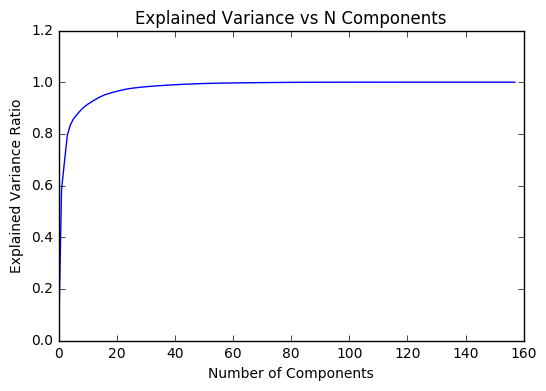

In [27]:
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np
explained=[]
for i in range(len(ft)):
    print i
    pca = PCA(n_components=i)
    pca.fit(featured[ft]).transform(featured[ft])
    explained.append(np.sum(pca.explained_variance_ratio_))



plt.figure()
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.plot(range(0,len(ft)),explained)
plt.title('Explained Variance vs N Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [28]:
pca = PCA(n_components=40)
pca.fit(featured[ft]).transform(featured[ft])

pca_train = pca.transform(ft_train[ft])
pca_val = pca.transform(ft_val[ft])
pca_test = pca.transform(ft_test[ft])




In [29]:
logreg_select=logreg_validation(C,solver,ft_train,ft_val,selected_ft,out)
print "NB"
nb_select= nb_validation(ft_train,ft_val,selected_ft,out)
print "RF"
n = range(100,1000,50)
rf_select= rf_validation(n,ft_train,ft_val,selected_ft,out)
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_select= gb_validation(lr,n,ft_train,ft_val,selected_ft,out)

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


GB


In [30]:

def pca_logreg_validation(C,solver,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for s in solver:
        for cv in C:
            print s,cv
            lg = linear_model.LogisticRegression(C=cv,solver=s,n_jobs=-1,max_iter=100000)
            lg.fit(train,train_y)
            score = f1_score(val_y, lg.predict(val),average='weighted')
            if score>sc_max:
                best=lg
                sc_max=score
    return best

def pca_rf_validation(n_estimators,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n,n_jobs=-1)
        rf.fit(train,train_y)
        score = f1_score(val_y, rf.predict(val),average='weighted')
        if score>sc_max:
            best=rf
            sc_max=score
    return best

n = range(100,1000,50)

#rf= rf_validation(n,train,val,ft,out)


#Função Naive Bayes

def pca_nb_validation(train,val,train_y,val_y):
    nb = GaussianNB()
    nb.fit(train,train_y)
    return nb


#Gradient Boosting
def pca_gb_validation(learning_rate,n_estimators,train,val,train_y,val_y):
    sc_max = -10000
    best=[]
    for n in n_estimators:
        for lr in learning_rate:
            gb = GradientBoostingClassifier(learning_rate=lr,n_estimators=n)
            gb.fit(train,train_y)
            score = f1_score(val_y, gb.predict(val),average='weighted')
            if score>sc_max:
                best=gb
                sc_max=score
    return best

In [31]:
logreg_pca=pca_logreg_validation(C,solver,pca_train,pca_val,ft_train['Output'],ft_val['Output'])
print "NB"
nb_pca= pca_nb_validation(pca_train,pca_val,ft_train['Output'],ft_val['Output'])
print "RF"
n = range(100,1000,50)
rf_pca= pca_rf_validation(n,pca_train,pca_val,ft_train['Output'],ft_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_pca= pca_gb_validation(lr,n,pca_train,pca_val,ft_train['Output'],ft_val['Output'])

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB


0


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


1
2
3
4
5


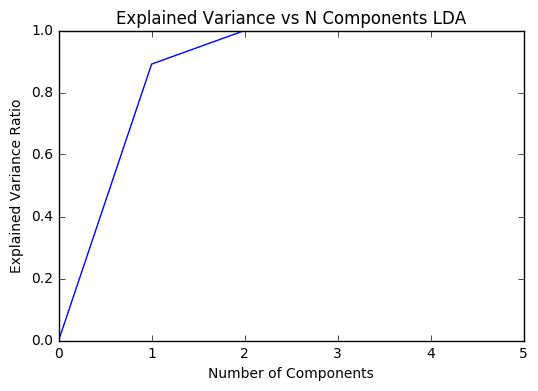

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
explained_lda=[]
for i in range(6):
    print i
    lda = LinearDiscriminantAnalysis(n_components=i)
    lda.fit(featured[ft],featured[out]).transform(featured[ft])
    explained_lda.append(np.sum(lda.explained_variance_ratio_))



plt.figure()
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.plot(range(0,6),explained_lda)
plt.title('Explained Variance vs N Components LDA')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [33]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(featured[ft],featured[out]).transform(featured[ft])

lda_train = lda.transform(ft_train[ft])
lda_val = lda.transform(ft_val[ft])
lda_test = lda.transform(ft_test[ft])

In [34]:
logreg_lda=pca_logreg_validation(C,solver,lda_train,lda_val,ft_train['Output'],ft_val['Output'])
print "NB"
nb_lda= pca_nb_validation(lda_train,lda_val,ft_train['Output'],ft_val['Output'])
print "RF"
n = range(100,1000,50)
rf_lda= pca_rf_validation(n,lda_train,lda_val,ft_train['Output'],ft_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_lda= pca_gb_validation(lr,n,lda_train,lda_val,ft_train['Output'],ft_val['Output'])

newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB


In [35]:
aynaive = [ft_train['Output'].mode()[0]]*len(ft_test)
ft_naive = f1_score(ft_test[out],aynaive,average='weighted')
print "PCA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", ft_naive,f1_score(ft_test[out],aynaive,average='macro'),f1_score(ft_test[out],aynaive,average='micro')
print "LogReg     ", f1_score(ft_test[out],logreg_pca.predict(pca_test),average='weighted'),f1_score(ft_test[out],logreg_pca.predict(pca_test),average='macro'),f1_score(ft_test[out],logreg_pca.predict(pca_test),average='micro')
print "Naive Bayes", f1_score(ft_test[out],nb_pca.predict(pca_test),average='weighted'),f1_score(ft_test[out],nb_pca.predict(pca_test),average='macro'),f1_score(ft_test[out],nb_pca.predict(pca_test),average='micro')
print "Random F.  ", f1_score(ft_test[out],rf_pca.predict(pca_test),average='weighted'),f1_score(ft_test[out],rf_pca.predict(pca_test),average='macro'),f1_score(ft_test[out],rf_pca.predict(pca_test),average='micro')
print "G. Boost.  ", f1_score(ft_test[out],gb_pca.predict(pca_test),average='weighted'),f1_score(ft_test[out],gb_pca.predict(pca_test),average='macro'),f1_score(ft_test[out],gb_pca.predict(pca_test),average='micro')


PCA
		F1Score	      F1 macro	    F1 micro
Naive       0.282057958123 0.207724425887 0.452615617892
LogReg      0.432415823675 0.379973045378 0.501137225171
Naive Bayes 0.436059481125 0.392559609028 0.478392721759
Random F.   0.409163447998 0.355168750453 0.490523123578
G. Boost.   0.424703425514 0.383274315528 0.459438968916


In [36]:
print "LDA"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", ft_naive,f1_score(ft_test[out],aynaive,average='macro'),f1_score(ft_test[out],aynaive,average='micro')
print "LogReg     ", f1_score(ft_test[out],logreg_lda.predict(lda_test),average='weighted'),f1_score(ft_test[out],logreg_lda.predict(lda_test),average='macro'),f1_score(ft_test[out],logreg_lda.predict(lda_test),average='micro')
print "Naive Bayes", f1_score(ft_test[out],nb_lda.predict(lda_test),average='weighted'),f1_score(ft_test[out],nb_lda.predict(lda_test),average='macro'),f1_score(ft_test[out],nb_lda.predict(lda_test),average='micro')
print "Random F.  ", f1_score(ft_test[out],rf_lda.predict(lda_test),average='weighted'),f1_score(ft_test[out],rf_lda.predict(lda_test),average='macro'),f1_score(ft_test[out],rf_lda.predict(lda_test),average='micro')
print "G. Boost.  ", f1_score(ft_test[out],gb_lda.predict(lda_test),average='weighted'),f1_score(ft_test[out],gb_lda.predict(lda_test),average='macro'),f1_score(ft_test[out],gb_lda.predict(lda_test),average='micro')


LDA
		F1Score	      F1 macro	    F1 micro
Naive       0.282057958123 0.207724425887 0.452615617892
LogReg      0.445788113948 0.394360151141 0.522365428355
Naive Bayes 0.481901482146 0.440495203256 0.522365428355
Random F.   0.453518162305 0.425691125976 0.464746019712
G. Boost.   0.474762049846 0.431846906987 0.523881728582


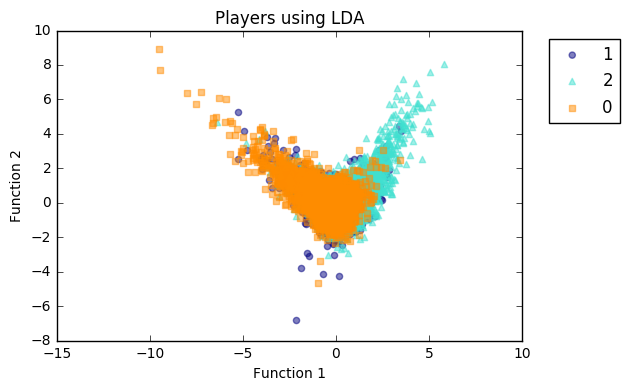

In [37]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(featured[ft],featured[out]).transform(featured[ft])

target_names = ['1', '2', '0']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()

for color, i, target_name,m in zip(colors, [ 0,1, 2], target_names,["o","^","s"]):
    plt.scatter(X_r2[featured['Output'] == i, 0], X_r2[featured['Output'] == i, 1], alpha=.5, color=color,
                label=target_name, marker=m)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
plt.title('Players using LDA')
plt.xlabel('Function 1')
plt.ylabel('Function 2')

plt.show()

In [38]:
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())

#data = pysql("Select * from data where league_id=21518 or league_id= 1729 or league_id=4769 or league_id=10257")

sf_data = pysql("Select * from featured where B365H<= 1.5 or B365A<=1.5")
f_data = pysql("Select * from featured where (B365H between 1.51 and 2.20) or (B365A between 1.51 and 2.20)")
eq_data = pysql("Select * from featured where B365H>=2.22 and B365A>=2.22")

SF
0
1
2
3
4
5


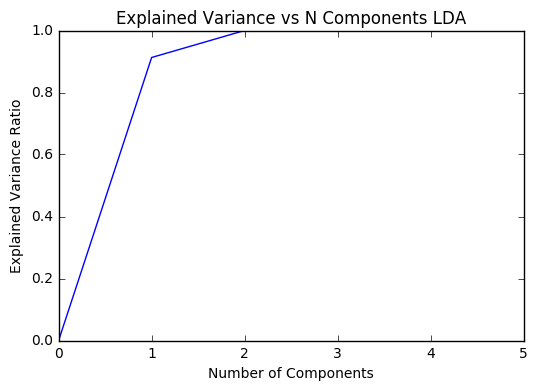

Favorito
0
1
2
3
4
5


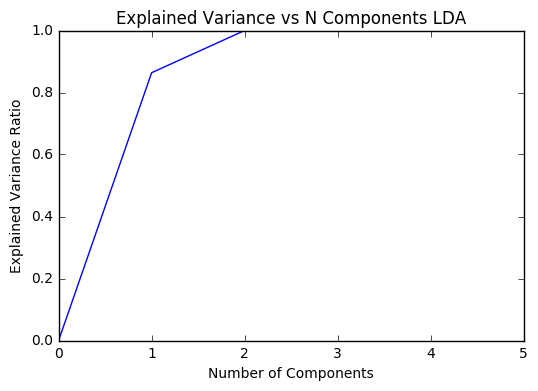

Equilibrado
0
1
2
3
4
5


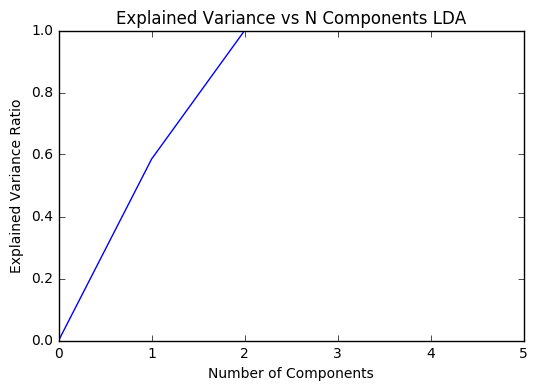

In [39]:

def def_ncomponents(data):
    explained=[]
    n=6
    for i in range(n):
        print i
        lda = LinearDiscriminantAnalysis(n_components=i)
        lda.fit(data[ft],data[out]).transform(data[ft])
        explained.append(np.sum(lda.explained_variance_ratio_))
    plt.figure()
    plt.legend(bbox_to_anchor=(1.04,1),loc='upper left', shadow=False, scatterpoints=1)
    plt.plot(range(0,n),explained)
    plt.title('Explained Variance vs N Components LDA')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    return plt
print "SF"
plt = def_ncomponents(sf_data)
plt.show()
print "Favorito"
plt = def_ncomponents(f_data)
plt.show()
print "Equilibrado"
plt = def_ncomponents(eq_data)
plt.show()

In [80]:
sf_train=sf_data[sf_data['season']<=5]
sf_val=sf_data[sf_data['season']==6]
sf_test=sf_data[sf_data['season']==7]

f_train=f_data[f_data['season']<=5]
f_val=f_data[f_data['season']==6]
f_test=f_data[f_data['season']==7]

eq_train=eq_data[eq_data['season']<=5]
eq_val=eq_data[eq_data['season']==6]
eq_test=eq_data[eq_data['season']==7]


def lda_filter(data,train,val,test):
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(data[ft],data[out]).transform(featured[ft])
    lda_train = lda.transform(train[ft])
    lda_val = lda.transform(val[ft])
    lda_test = lda.transform(test[ft])
    return lda,lda_train,lda_val,lda_test

sf_lda,sf_train_lda,sf_val_lda,sf_test_lda = lda_filter(sf_data,sf_train,sf_val,sf_test)
f_lda,f_train_lda,f_val_lda,f_test_lda = lda_filter(f_data,f_train,f_val,f_test)
eq_lda,eq_train_lda,eq_val_lda,eq_test_lda = lda_filter(eq_data,eq_train,eq_val,eq_test)


In [81]:
print "-------SF-----------"
logreg_lda_sf=pca_logreg_validation(C,solver,sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])
print "NB"
nb_lda_sf= pca_nb_validation(sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])
print "RF"
n = range(100,1000,50)
rf_lda_sf= pca_rf_validation(n,sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_lda_sf= pca_gb_validation(lr,n,sf_train_lda,sf_val_lda,sf_train['Output'],sf_val['Output'])

-------SF-----------
newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB


In [ ]:
len(sf_val_lda)

In [82]:
print "-------f-----------"
logreg_lda_f=pca_logreg_validation(C,solver,f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])
print "NB"
nb_lda_f= pca_nb_validation(f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])
print "RF"
n = range(100,1000,50)
rf_lda_f= pca_rf_validation(n,f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_lda_f= pca_gb_validation(lr,n,f_train_lda,f_val_lda,f_train['Output'],f_val['Output'])

-------f-----------
newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB


In [83]:
print "-------eq-----------"
logreg_lda_eq=pca_logreg_validation(C,solver,eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])
print "NB"
nb_lda_eq= pca_nb_validation(eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])
print "RF"
n = range(100,1000,50)
rf_lda_eq= pca_rf_validation(n,eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])
lr= [0.0001, 0.001, 0.01, 0.1]
print "GB"
gb_lda_eq= pca_gb_validation(lr,n,eq_train_lda,eq_val_lda,eq_train['Output'],eq_val['Output'])

-------eq-----------
newton-cg 0.001
newton-cg 0.01
newton-cg 0.1
newton-cg 1
newton-cg 10
newton-cg 100
newton-cg 1000
lbfgs 0.001
lbfgs 0.01
lbfgs 0.1
lbfgs 1
lbfgs 10
lbfgs 100
lbfgs 1000
liblinear 0.001
liblinear 0.01
liblinear 0.1
liblinear 1
liblinear 10
liblinear 100
liblinear 1000
sag 0.001
sag 0.01
sag 0.1
sag 1
sag 10
sag 100
sag 1000
NB
RF
GB


In [84]:
aynaive = [sf_train['Output'].mode()[0]]*len(sf_test)
ft_naive = f1_score(sf_test[out],aynaive,average='weighted')
print "LDA - SF"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", ft_naive,f1_score(sf_test[out],aynaive,average='macro'),f1_score(sf_test[out],aynaive,average='micro')
print "LogReg     ", f1_score(sf_test[out],logreg_lda_sf.predict(sf_test_lda),average='weighted'),f1_score(sf_test[out],logreg_lda_sf.predict(sf_test_lda),average='macro'),f1_score(sf_test[out],logreg_lda_sf.predict(sf_test_lda),average='micro')
print "Naive Bayes", f1_score(sf_test[out],nb_lda_sf.predict(sf_test_lda),average='weighted'),f1_score(sf_test[out],nb_lda_sf.predict(sf_test_lda),average='macro'),f1_score(sf_test[out],nb_lda_sf.predict(sf_test_lda),average='micro')
print "Random F.  ", f1_score(sf_test[out],rf_lda_sf.predict(sf_test_lda),average='weighted'),f1_score(sf_test[out],rf_lda_sf.predict(sf_test_lda),average='macro'),f1_score(sf_test[out],rf_lda_sf.predict(sf_test_lda),average='micro')
print "G. Boost.  ", f1_score(sf_test[out],gb_lda_sf.predict(sf_test_lda),average='weighted'),f1_score(sf_test[out],gb_lda_sf.predict(sf_test_lda),average='macro'),f1_score(sf_test[out],gb_lda_sf.predict(sf_test_lda),average='micro')


LDA - SF
		F1Score	      F1 macro	    F1 micro
Naive       0.521747867229 0.264475743349 0.657587548638
LogReg      0.723228986071 0.559897032554 0.785992217899
Naive Bayes 0.711653994667 0.538464417373 0.778210116732
Random F.   0.723875782794 0.591135683333 0.747081712062
G. Boost.   0.66932567397 0.513635673958 0.688715953307


In [85]:
aynaive = [f_train['Output'].mode()[0]]*len(f_test)
ft_naive = f1_score(f_test[out],aynaive,average='weighted')
print "LDA - f"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", ft_naive,f1_score(f_test[out],aynaive,average='macro'),f1_score(f_test[out],aynaive,average='micro')
print "LogReg     ", f1_score(f_test[out],logreg_lda_f.predict(f_test_lda),average='weighted'),f1_score(f_test[out],logreg_lda_f.predict(f_test_lda),average='macro'),f1_score(f_test[out],logreg_lda_f.predict(f_test_lda),average='micro')
print "Naive Bayes", f1_score(f_test[out],nb_lda_f.predict(f_test_lda),average='weighted'),f1_score(f_test[out],nb_lda_f.predict(f_test_lda),average='macro'),f1_score(f_test[out],nb_lda_f.predict(f_test_lda),average='micro')
print "Random F.  ", f1_score(f_test[out],rf_lda_f.predict(f_test_lda),average='weighted'),f1_score(f_test[out],rf_lda_f.predict(f_test_lda),average='macro'),f1_score(f_test[out],rf_lda_f.predict(f_test_lda),average='micro')
print "G. Boost.  ", f1_score(f_test[out],gb_lda_f.predict(f_test_lda),average='weighted'),f1_score(f_test[out],gb_lda_f.predict(f_test_lda),average='macro'),f1_score(f_test[out],gb_lda_f.predict(f_test_lda),average='micro')


LDA - f
		F1Score	      F1 macro	    F1 micro
Naive       0.26297638914 0.201853759011 0.434268833087
LogReg      0.444057514249 0.400901351033 0.515509601182
Naive Bayes 0.449923531477 0.407385213268 0.519940915805
Random F.   0.464064797478 0.439582277166 0.480059084195
G. Boost.   0.456495514555 0.421255811837 0.500738552437


In [86]:
aynaive = [eq_train['Output'].mode()[0]]*len(eq_test_lda)
ft_naive = f1_score(eq_test[out],aynaive,average='weighted')
print "LDA - eq"
print "\t\tF1Score\t","      F1 macro\t","    F1 micro"
print "Naive      ", ft_naive,f1_score(eq_test[out],aynaive,average='macro'),f1_score(eq_test[out],aynaive,average='micro')
print "LogReg     ", f1_score(eq_test[out],logreg_lda_eq.predict(eq_test_lda),average='weighted'),f1_score(eq_test[out],logreg_lda_eq.predict(eq_test_lda),average='macro'),f1_score(eq_test[out],logreg_lda_eq.predict(eq_test_lda),average='micro')
print "Naive Bayes", f1_score(eq_test[out],nb_lda_eq.predict(eq_test_lda),average='weighted'),f1_score(eq_test[out],nb_lda_eq.predict(eq_test_lda),average='macro'),f1_score(eq_test[out],nb_lda_eq.predict(eq_test_lda),average='micro')
print "Random F.  ", f1_score(eq_test[out],rf_lda_eq.predict(eq_test_lda),average='weighted'),f1_score(eq_test[out],rf_lda_eq.predict(eq_test_lda),average='macro'),f1_score(eq_test[out],rf_lda_eq.predict(eq_test_lda),average='micro')
print "G. Boost.  ", f1_score(eq_test[out],gb_lda_eq.predict(eq_test_lda),average='weighted'),f1_score(eq_test[out],gb_lda_eq.predict(eq_test_lda),average='macro'),f1_score(eq_test[out],gb_lda_eq.predict(eq_test_lda),average='micro')


LDA - eq
		F1Score	      F1 macro	    F1 micro
Naive       0.179726246778 0.172125883109 0.348051948052
LogReg      0.452057002503 0.450618814221 0.45974025974
Naive Bayes 0.452415618137 0.451144650005 0.45974025974
Random F.   0.388979617931 0.388640843116 0.38961038961
G. Boost.   0.420342613965 0.41828346356 0.436363636364


In [98]:
teste_tudo_lda = featured[featured['season']==7]
filtro=[]
for index,row in teste_tudo_lda.iterrows():
    if row['B365H']<= 1.5 or row['B365A']<= 1.5:
        filtro.append(rf_lda_sf.predict(sf_lda.transform(row[ft].values.reshape(1,-1)))[0])
    elif row['B365H']<= 2.2 or row['B365A']<= 2.2:
        filtro.append(rf_lda_f.predict(f_lda.transform(row[ft].values.reshape(1,-1)))[0])
    else:
        filtro.append(nb_lda_eq.predict(eq_lda.transform(row[ft].values.reshape(1,-1)))[0])
        

print f1_score(teste_tudo_lda['Output'],filtro)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [106]:
print "F1Score\t","      F1 macro\t","    F1 micro"
print f1_score(teste_tudo_lda['Output'],filtro,average='weighted'),f1_score(teste_tudo_lda['Output'],filtro,average='macro'),f1_score(teste_tudo_lda['Output'],filtro,average='micro')

from sklearn.metrics import accuracy_score
print "Acurácia"
accuracy_score(teste_tudo_lda['Output'],filtro)


F1Score	      F1 macro	    F1 micro
0.509118007943 0.479240432392 0.526156178923
Acurácia


0.52615617892342681